## Imports

In [4]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Loading the dataset

Extra Code to be able to load the dataset.csv file from google drive.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', 'CS453/hw01')
# print(os.listdir(GOOGLE_DRIVE_PATH))

# If done correctly, this should print the files in the directory. You may need to edit some path names in the GOOGLE_DRIVE_PATH line to match your file path.

In [3]:
X, y = [], []

# The commented out line below is if you're using google colab, place the dataset file in the same path as the colab file, comment out the other with line.
# with open(GOOGLE_DRIVE_PATH + '/dataset.csv', 'r') as f:
with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))

print(len(X), len(y))

100 100


In [5]:
random.seed(0)

idx = list(range(len(X)))
random.shuffle(idx)

X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

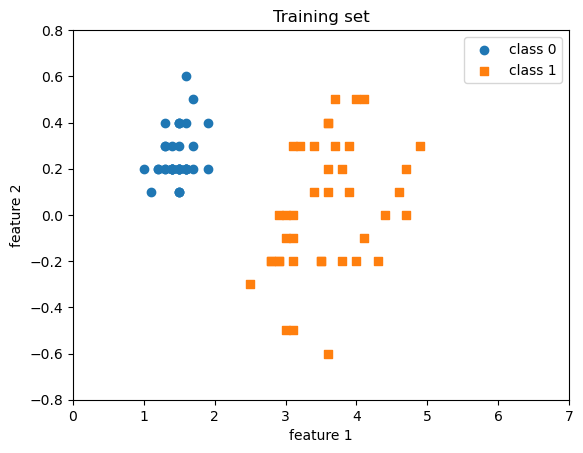

In [7]:
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## Defining the Perceptron model

In [8]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0] * num_features
        self.bias = 0

    def forward(self, x):
        # Iterates through each row of x, give each row the name feature.
        # For each row, we compute the dot multiplication between the feature row and the weight column., we then add the bias on to the
        # scalar produced by the dot multiplication.
        linear = [(sum([feature[i] * self.weights[i] for i in range(len(feature))]) + self.bias) for feature in x]

        # sign function that gives 0 or 1 depending on the value.
        prediction = [1 if i > 0 else 0 for i in linear]
        return prediction

    def backward(self, x, y):
        # Makes a prediction using our current model
        prediction = self.forward(x)

        # Calculates error by subtracting the prediction value from the actual value
        error = [yActual - yPred for yPred, yActual in zip(prediction, y)]
        return error

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(len(y)):
                # Pass in a list of our feature as that is what our forward method accepts
                errors = self.backward([x[i]], [y[i]])

                # Calculating the weights
                self.weights = [self.weights[j] + (errors[0] * x[i][j]) for j in range(len(self.weights))]
                self.bias += errors[0]

    def evaluate(self, x, y):
        predictions = self.forward(x)

        # Counts number correct
        accuracy = [prediction == actual for prediction, actual in zip(predictions, y)]

        # How many correct out of how many total predictions were made.
        accuracy = sum(accuracy) / len(y)
        return accuracy

## Training the Perceptron

In [9]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print(ppn.weights)
print(ppn.bias)




[0.49999999999999956, -0.4000000000000002]
-1


## Evaluating the model

In [10]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [11]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## Decision Boundary

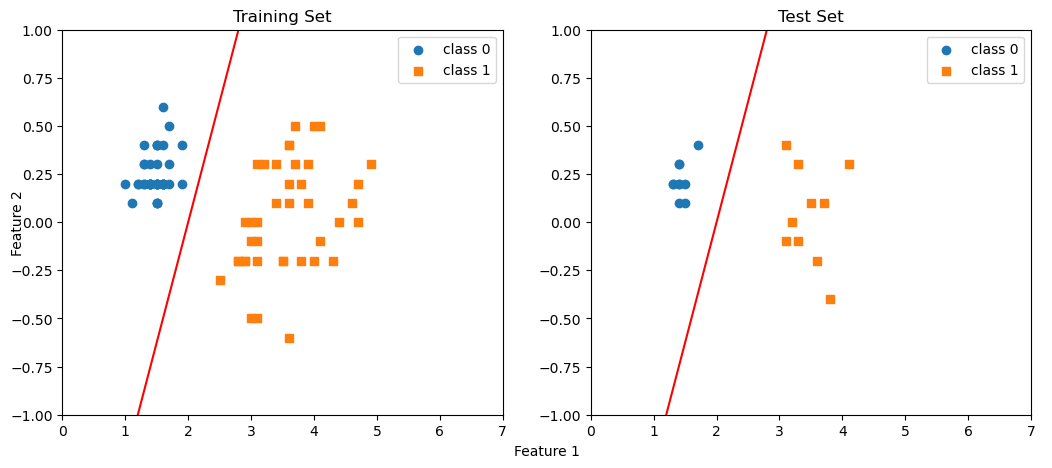

In [12]:
##########################
### 2D Decision Boundary
##########################

weights = ppn.weights
bias = ppn.bias

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12.5, 5))

# Our equation to solve for the decision boundary is:
# w * x + bias = 0
# => [w1, w2] * [x, y] + bias = 0
# => (w1 * x) + (w2 * y) + bias = 0
# => (w1 * x) + bias = - (w2 * y)
# => -1 * (1 / w2) * ((w1 * x) + bias) = y
# = > y = (-1) * (1 / weights[1]) * ((weights[0] * x) + bias[0])

x_cords = [-6, 12]
y_cords = [(-1) * (1 / weights[1]) * ((weights[0] * x) + bias) for x in x_cords]

# Graphing the lines based off the coordinates
ax[0].plot(x_cords, y_cords, 'red')
ax[1].plot(x_cords, y_cords, 'red')

# Showing scatterplot of trainig data
ax[0].scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

ax[0].scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

# Showing scatterplot of testing data
ax[1].scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')

ax[1].scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')

# Setting boundries of our plot
ax[0].set_ylim([-1, 1])
ax[1].set_ylim([-1, 1])
ax[0].set_xlim([0, 7])
ax[1].set_xlim([0, 7])

# Titles for the plot
ax[0].title.set_text('Training Set')
ax[1].title.set_text('Test Set')

# X axis and Y axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


# Displaying the graphs
ax[0].legend()
ax[1].legend()
plt.show()